In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

import xgboost as xgb
from xgboost import XGBClassifier, DMatrix

plt.style.use('ggplot')

In [2]:
# Load dataset
df = pd.read_csv('train_dataset_final1.csv')

In [3]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,25247.0,17640.000000,7288.325459,5017.00,11328.500,17640.00,23951.500,30263.00
marriage,25247.0,1.551907,0.522629,0.00,1.000,2.00,2.000,3.00
sex,25247.0,0.604111,0.489050,0.00,0.000,1.00,1.000,1.00
education,25247.0,1.852101,0.797379,0.00,1.000,2.00,2.000,6.00
LIMIT_BAL,25247.0,168342.060443,129892.784807,10000.00,50000.000,140000.00,240000.000,1000000.00
age,25121.0,35.438199,9.174998,21.00,28.000,34.00,41.000,79.00
pay_0,25247.0,-0.042857,1.099315,-2.00,-1.000,0.00,0.000,8.00
pay_2,25247.0,-0.159544,1.173990,-2.00,-1.000,0.00,0.000,8.00
pay_3,25247.0,-0.190359,1.172636,-2.00,-1.000,0.00,0.000,8.00
pay_4,25247.0,-0.241415,1.146753,-2.00,-1.000,0.00,0.000,7.00


In [6]:
df.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

In [7]:
# Fill missing values and clean data
df['age'] = df['age'].fillna(df['age'].median()).astype(int)
df = df.drop_duplicates()
df['Customer_ID'] = df['Customer_ID'].astype(str)
df = df.drop('Customer_ID', axis=1)


In [8]:
# Convert int64 to int32 to reduce memory
int64_cols = df.select_dtypes(include=['int64']).columns
df[int64_cols] = df[int64_cols].astype('int32')

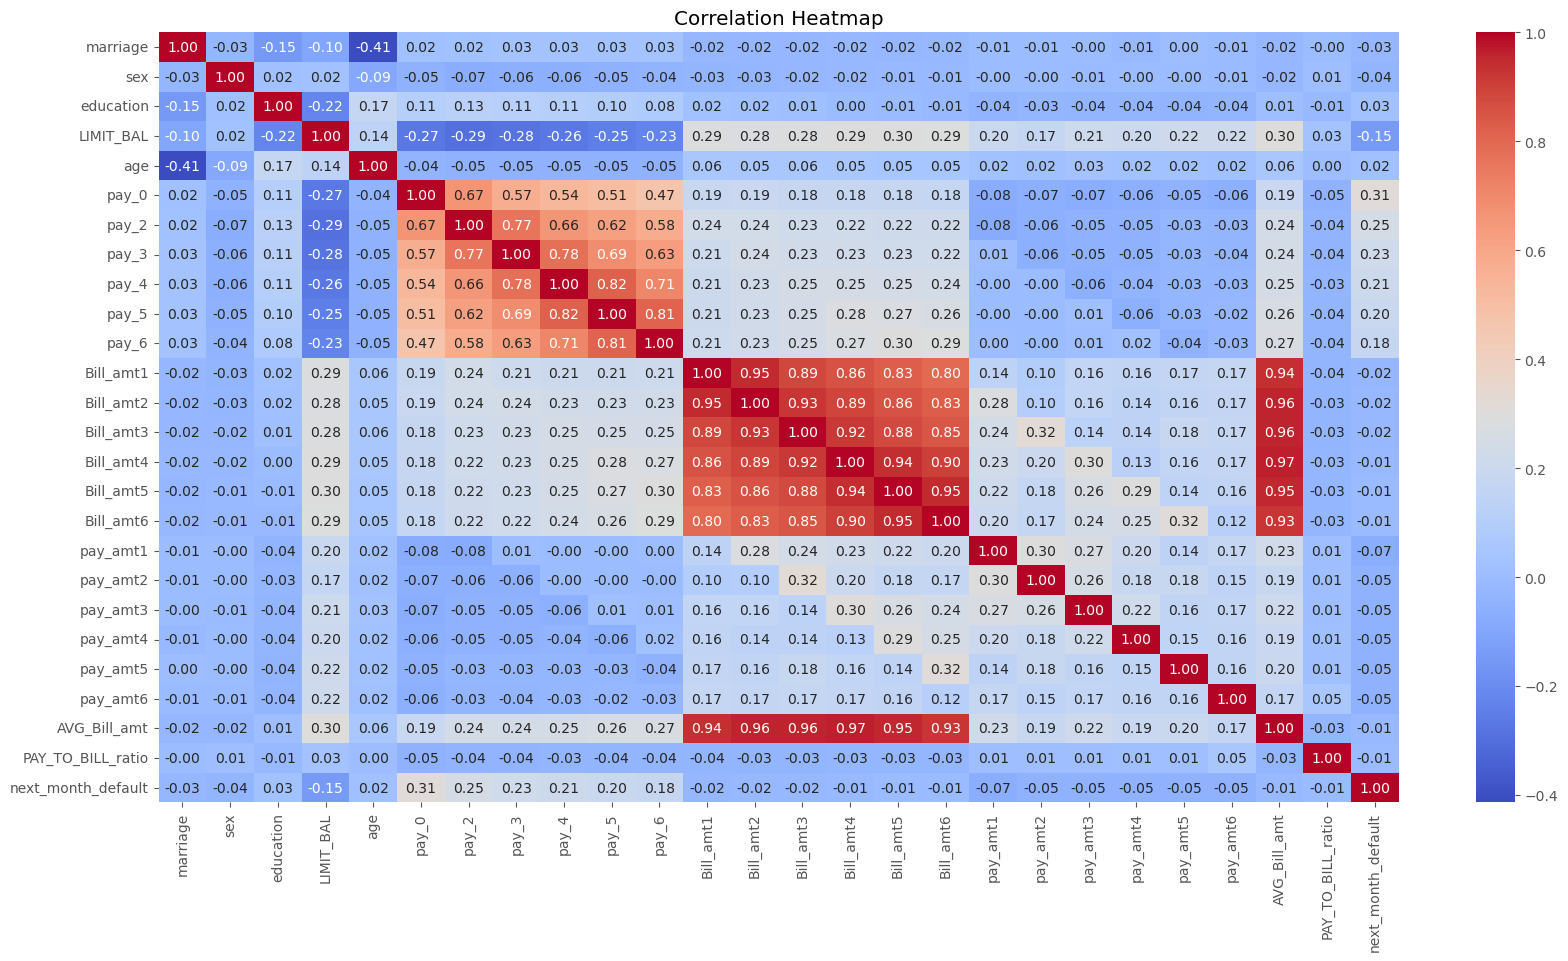

In [9]:
# EDA: Correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

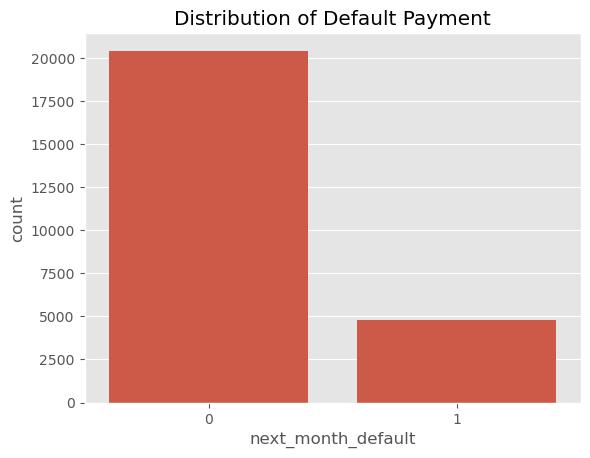

In [10]:
# Visual: Distribution of Default Payments
sns.countplot(x='next_month_default', data=df)
plt.title('Distribution of Default Payment')
plt.show()

In [11]:
# Feature-Target Split
X = df.drop('next_month_default', axis=1)
y = df['next_month_default']

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# ---------------- Logistic Regression ----------------
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [15]:
# ---------------- Decision Tree with GridSearchCV ----------------
param_grid_dt = {
    'max_depth': np.arange(3, 10),
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [5, 10, 20, 100],
    'min_samples_split': [2, 5, 10, 20]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='f1')
grid_tree.fit(X_train, y_train)
dt_best = grid_tree.best_estimator_
y_pred_dt = dt_best.predict(X_test)

In [16]:
# ---------------- XGBoost with GridSearchCV ----------------
param_test_xgb = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
}
xgb_search = GridSearchCV(
    estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, gamma=0, subsample=0.8,
                            colsample_bytree=0.8, objective='binary:logistic', nthread=4,
                            scale_pos_weight=1, seed=27),
    param_grid=param_test_xgb, scoring='f1', n_jobs=-1, cv=3, verbose=0
)
xgb_search.fit(X_train, y_train)
xgb_best = xgb_search.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)

In [17]:
# ---------------- Random Forest with SMOTE ----------------
X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)
rf_model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test_scaled)

In [18]:
# ---------------- Evaluation Function ----------------
def evaluate_model(name, y_true, y_pred, train_data=None, model=None):
    print(f"\n=== {name} ===")
    if model and train_data is not None:
        print(f"Train Accuracy: {accuracy_score(y_train, model.predict(train_data)):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"F2 Score: {fbeta_score(y_true, y_pred, beta=2):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


In [19]:
# ---------------- Model Evaluation ----------------
evaluate_model("Logistic Regression", y_test, y_pred_lr, X_train_scaled, lr_model)
evaluate_model("Decision Tree", y_test, y_pred_dt, X_train, dt_best)
evaluate_model("XGBoost", y_test, y_pred_xgb, X_train, xgb_best)
evaluate_model("Random Forest (SMOTE)", y_test, y_pred_rf, X_train_scaled, rf_model)


=== Logistic Regression ===
Train Accuracy: 0.8272
Test Accuracy: 0.8323
Precision: 0.7061
Recall: 0.1937
F1 Score: 0.3040
F2 Score: 0.2266
Confusion Matrix:
 [[4018   77]
 [ 770  185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90      4095
           1       0.71      0.19      0.30       955

    accuracy                           0.83      5050
   macro avg       0.77      0.59      0.60      5050
weighted avg       0.81      0.83      0.79      5050


=== Decision Tree ===
Train Accuracy: 0.8529
Test Accuracy: 0.8370
Precision: 0.6284
Recall: 0.3382
F1 Score: 0.4398
F2 Score: 0.3726
Confusion Matrix:
 [[3904  191]
 [ 632  323]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4095
           1       0.63      0.34      0.44       955

    accuracy                           0.84      5050
   macro avg       0.74      0.65      

In [20]:
# ---------------- Collect and Display Model Metrics ----------------

# Initialize list to store results
results = []

# Function to evaluate and collect metrics
def collect_metrics(name, y_true, y_pred, train_data=None, model=None):
    result = {
        "Classifier": name,
        "Train Accuracy": accuracy_score(y_train, model.predict(train_data)) if model and train_data is not None else None,
        "Test Accuracy": accuracy_score(y_true, y_pred),
        "Precision Score": precision_score(y_true, y_pred),
        "Recall Score": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "F2 Score": fbeta_score(y_true, y_pred, beta=2)
    }
    results.append(result)

# Collect results for each model
collect_metrics("Logistic Regression", y_test, y_pred_lr, X_train_scaled, lr_model)
collect_metrics("Decision Tree", y_test, y_pred_dt, X_train, dt_best)
collect_metrics("XGBoost", y_test, y_pred_xgb, X_train, xgb_best)
collect_metrics("Random Forest (SMOTE)", y_test, y_pred_rf, X_train_scaled, rf_model)

# Create DataFrame and round values
results_df = pd.DataFrame(results)
results_df = results_df.round(6)


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Print formatted comparison table
print("\n=== Model Comparison Table ===")
print(results_df.to_string(index=False))



=== Model Comparison Table ===
           Classifier  Train Accuracy  Test Accuracy  Precision Score  Recall Score  F1 Score  F2 Score
  Logistic Regression        0.827153       0.832277         0.706107      0.193717  0.304026  0.226605
        Decision Tree        0.852899       0.837030         0.628405      0.338220  0.439755  0.372635
              XGBoost        0.846858       0.843366         0.660784      0.352880  0.460068  0.389145
Random Forest (SMOTE)        0.840471       0.797624         0.470328      0.556021  0.509597  0.536472


In [21]:
#validation data

In [22]:
df_validate = pd.read_csv("validate_dataset_final.csv")

In [23]:
df_validate.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio'],
      dtype='object')

In [24]:
X_validate  = df_validate.drop("Customer_ID", axis=1)

In [25]:
X_validate

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,2,220000,32,0,0,0,0,0,0,28853.10,29144.77,27172.12,22066.47,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,0,1,350000,35,-1,-1,-1,0,0,0,4438.78,33718.18,14284.09,16425.68,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,2,1,1,310000,39,0,0,0,0,0,0,300500.53,265766.60,245457.90,249435.52,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,1,0,2,20000,47,0,0,0,2,2,2,10628.45,11650.67,14252.14,13678.06,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,2,1,2,500000,30,0,0,0,0,0,0,98617.77,73464.07,84740.39,72510.59,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,1,0,2,240000,51,0,0,0,0,0,0,98588.36,100544.66,102650.93,104748.89,106832.47,109060.11,3591.87,3718.80,3797.93,3820.66,3949.01,3976.22,103737.83,0.04
5012,1,1,3,60000,33,0,0,0,0,0,0,57560.27,57765.42,49351.45,28547.74,29062.53,28862.41,2100.23,3000.32,1499.86,1499.82,1099.82,1100.18,41858.83,0.04
5013,1,0,1,290000,36,1,-2,-1,-1,0,0,0.00,0.00,567.27,16166.71,16725.60,17427.88,0.00,568.10,16165.93,1000.03,1000.05,1000.15,8481.17,0.39
5014,1,1,2,120000,28,0,0,0,0,0,0,103675.25,96833.58,78920.51,74309.81,75710.06,77502.18,3283.48,2999.75,5000.26,3000.13,2999.95,4000.04,84492.00,0.04


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_validate_scaled = scaler.fit_transform(X_validate)

In [27]:
#Random Forest (SMOTE) for final prediction on validation set for best result out of all above method

In [28]:
y_pred_validate_rf = rf_model.predict(X_validate)

C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [29]:
y_pred_validate_rf

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
rf_Output = pd.DataFrame({
    "Customer_ID" : df_validate["Customer_ID"],
    "next_month_default" : y_pred_validate_rf}
    )

In [31]:
rf_Output.sample(5)

,Customer_ID,next_month_default
1226,1227,0
4310,4311,1
85,86,0
732,733,0
369,370,0


In [32]:
rf_Output.to_csv("Submission_22113171.csv", index= False)